In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import io
%cd "C:\Users\ykkou\Desktop\imarticus\Tutorial Datasets\Enzyme Substrate" 

C:\Users\ykkou\Desktop\imarticus\Tutorial Datasets\Enzyme Substrate


In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
submission = pd.read_csv('sample_submission.csv')

In [4]:
train_ec1 = train.drop(['EC2', 'EC3', 'EC4', 'EC5', 'EC6'],axis=1)

In [5]:
train_ec2 = train.drop(['EC1', 'EC3', 'EC4', 'EC5', 'EC6'],axis=1)

<AxesSubplot:>

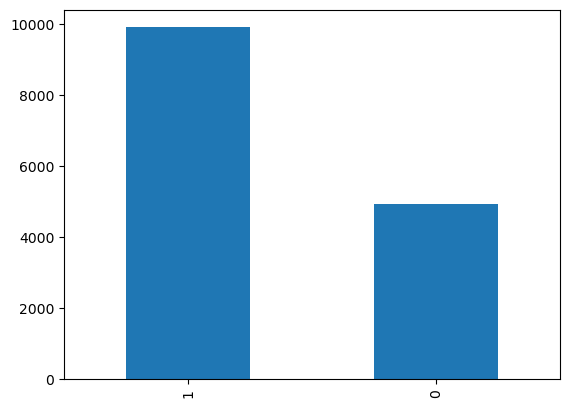

In [6]:
train_ec1.EC1.value_counts().plot(kind='bar')

<AxesSubplot:>

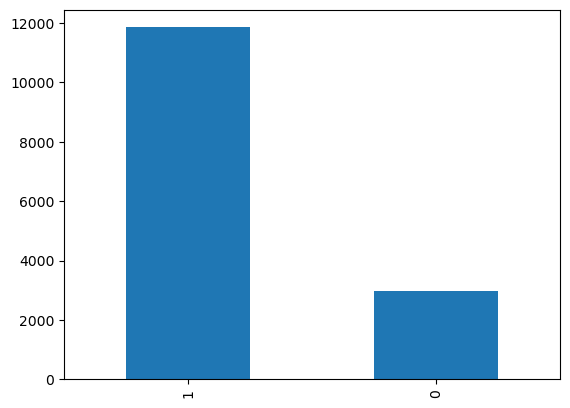

In [7]:
train_ec2.EC2.value_counts().plot(kind='bar')

In [8]:
from imblearn.under_sampling import RandomUnderSampler

In [93]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
rus = RandomUnderSampler(random_state=42)

In [97]:
ros = RandomOverSampler(random_state=42)

In [10]:
X_ec1 = train_ec1.drop('EC1',axis=1)

In [11]:
y_ec1 = train_ec1.EC1

In [12]:
X_ec1_rus, y_ec1_rus = rus.fit_resample(X_ec1,y_ec1)

In [100]:
X_ec1_ros , y_ec1_ros = ros.fit_resample(X_ec1,y_ec1)

In [102]:
y_ec1.value_counts(),y_ec1_ros.value_counts(),y_ec1_rus.value_counts()

(1    9908
 0    4930
 Name: EC1, dtype: int64,
 1    9908
 0    9908
 Name: EC1, dtype: int64,
 0    4930
 1    4930
 Name: EC1, dtype: int64)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression(max_iter=7000)

In [27]:
lr_ec1_rus = lr.fit(X_ec1_rus,y_ec1_rus)

In [28]:
lr_ec1_rus.score(X_ec1_rus,y_ec1_rus)

0.6414807302231237

In [29]:
from sklearn.metrics import classification_report, RocCurveDisplay

In [18]:
from sklearn.model_selection import cross_val_score

In [30]:
print(classification_report(y_ec1_rus,lr_ec1_rus.predict(X_ec1_rus)))

              precision    recall  f1-score   support

           0       0.66      0.57      0.61      4930
           1       0.62      0.71      0.67      4930

    accuracy                           0.64      9860
   macro avg       0.64      0.64      0.64      9860
weighted avg       0.64      0.64      0.64      9860



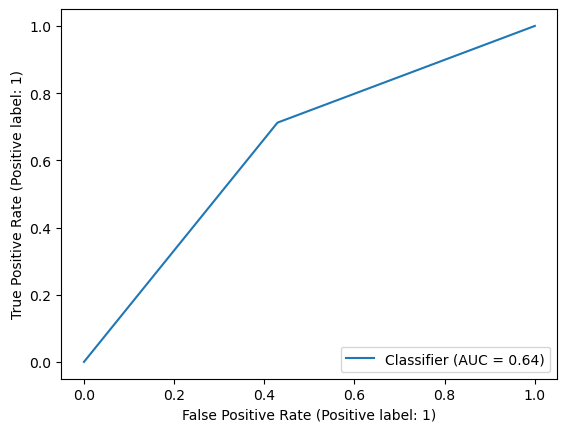

In [31]:
RocCurveDisplay.from_predictions(y_ec1_rus,lr_ec1_rus.predict(X_ec1_rus))

In [32]:
np.mean(cross_val_score(lr,X_ec1_rus,y_ec1_rus,cv=5))

0.6384381338742393

In [146]:
ec1_ruc_pred = lr_ec1_rus.predict(test)

In [35]:
X_ec2 = train_ec2.drop('EC2',axis=1)

In [36]:
y_ec2 = train_ec2.EC2

In [118]:
X_ec2_ros,y_ec2_ros = ros.fit_resample(X_ec2,y_ec2)

In [40]:
X_ec2_rus,y_ec2_rus = rus.fit_resample(X_ec2,y_ec2)

In [120]:
y_ec2.value_counts(),y_ec2_ros.value_counts(),y_ec2_rus.value_counts()

(1    11855
 0     2983
 Name: EC2, dtype: int64,
 1    11855
 0    11855
 Name: EC2, dtype: int64,
 0    2983
 1    2983
 Name: EC2, dtype: int64)

In [43]:
lr_ec2_rus = lr.fit(X_ec2_rus,y_ec2_rus)

In [44]:
lr_ec2_rus.score(X_ec2_rus,y_ec2_rus)

0.5628561850486088

In [45]:
print(classification_report(y_ec2_rus,lr_ec2_rus.predict(X_ec2_rus)))

              precision    recall  f1-score   support

           0       0.56      0.57      0.57      2983
           1       0.56      0.55      0.56      2983

    accuracy                           0.56      5966
   macro avg       0.56      0.56      0.56      5966
weighted avg       0.56      0.56      0.56      5966



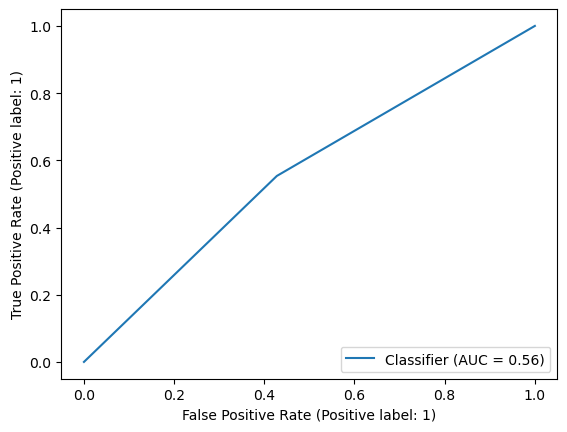

In [46]:
RocCurveDisplay.from_predictions(y_ec2_rus,lr_ec2_rus.predict(X_ec2_rus))

In [48]:
np.mean(cross_val_score(lr,X_ec2_rus,y_ec2_rus))

0.5487741866639708

In [157]:
ec2_ruc_pred = lr_ec2_rus.predict(test)

In [60]:
ec2_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
# Smote Model

In [162]:
from imblearn.over_sampling import SMOTEN

In [163]:
smote = SMOTEN(random_state=42)

In [164]:
X_ec1_smote,y_ec1_smote = smote.fit_resample(X_ec1,y_ec1)

In [165]:
y_ec1.value_counts(),y_ec1_smote.value_counts()

(1    9908
 0    4930
 Name: EC1, dtype: int64,
 1    9908
 0    9908
 Name: EC1, dtype: int64)

In [167]:
lr_ec1_smote = lr.fit(X_ec1_smote,y_ec1_smote)

In [168]:
lr_ec1_smote.score(X_ec1_smote,y_ec1_smote)

0.7404117884537748

In [170]:
np.mean(cross_val_score(lr,X_ec1_smote,y_ec1_smote,cv=10))

0.7157190586046759

In [171]:
print(classification_report(y_ec1_smote,lr_ec1_smote.predict(X_ec1_smote)))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      9908
           1       0.72      0.78      0.75      9908

    accuracy                           0.74     19816
   macro avg       0.74      0.74      0.74     19816
weighted avg       0.74      0.74      0.74     19816



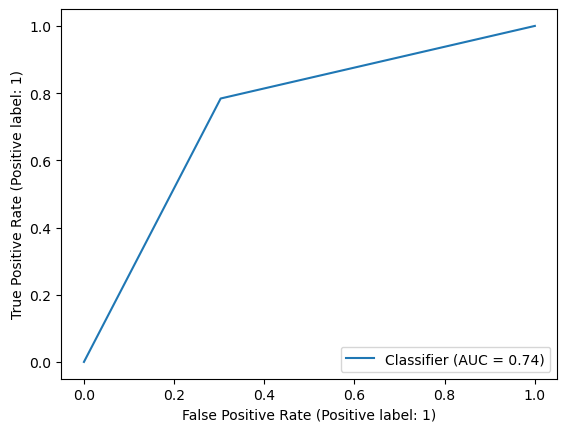

In [172]:
RocCurveDisplay.from_predictions(y_ec1_smote,lr_ec1_smote.predict(X_ec1_smote))

In [173]:
ec1_smote_pred = lr_ec1_smote.predict(test)

In [177]:
X_ec2_smote,y_ec2_smote = smote.fit_resample(X_ec2,y_ec2)

In [193]:
lr_ec2_smote = lr.fit(X_ec2_smote,y_ec2_smote)

In [194]:
lr_ec2_smote.score(X_ec2_smote,y_ec2_smote)

0.789329396878954

In [195]:
print(classification_report(y_ec2_smote,lr_ec2_smote.predict(X_ec2_smote)))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78     11855
           1       0.77      0.83      0.80     11855

    accuracy                           0.79     23710
   macro avg       0.79      0.79      0.79     23710
weighted avg       0.79      0.79      0.79     23710



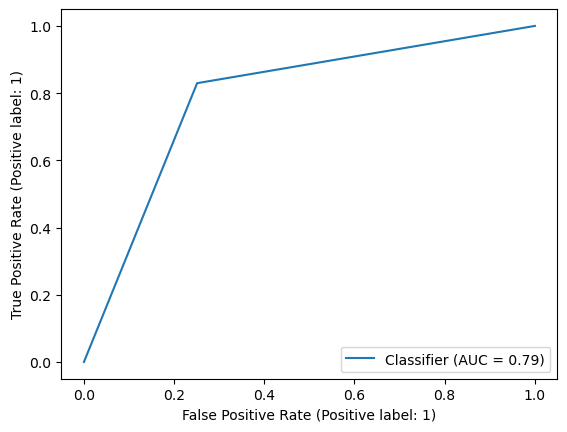

In [196]:
RocCurveDisplay.from_predictions(y_ec2_smote,lr_ec2_smote.predict(X_ec2_smote))

In [197]:
ec2_smote_pred = lr_ec2_smote.predict(test)

In [202]:
from imblearn.under_sampling import TomekLinks

In [203]:
tl = TomekLinks(sampling_strategy='majority')

In [204]:
X_ec1_tl,y_ec1_tl = tl.fit_resample(X_ec1,y_ec1)

In [208]:
y_ec1_tl.value_counts(),y_ec1.value_counts()

(1    8430
 0    4930
 Name: EC1, dtype: int64,
 1    9908
 0    4930
 Name: EC1, dtype: int64)

In [206]:
X_ec2_tl, y_ec2_tl = tl.fit_resample(X_ec2,y_ec2)

In [209]:
y_ec2_tl.value_counts(),y_ec2.value_counts()

(1    10654
 0     2983
 Name: EC2, dtype: int64,
 1    11855
 0     2983
 Name: EC2, dtype: int64)

In [210]:
lr_ec1_tl = lr.fit(X_ec1_tl,y_ec1_tl)

In [211]:
lr_ec1_tl.score(X_ec1_tl,y_ec1_tl)

0.6862275449101797

In [235]:
np.mean(cross_val_score(lr,X_ec1_tl,y_ec1_tl,cv=10))

0.68562874251497

In [213]:
print(classification_report(y_ec1_tl,lr_ec1_tl.predict(X_ec1_tl)))

              precision    recall  f1-score   support

           0       0.63      0.37      0.47      4930
           1       0.70      0.87      0.78      8430

    accuracy                           0.69     13360
   macro avg       0.66      0.62      0.62     13360
weighted avg       0.67      0.69      0.66     13360



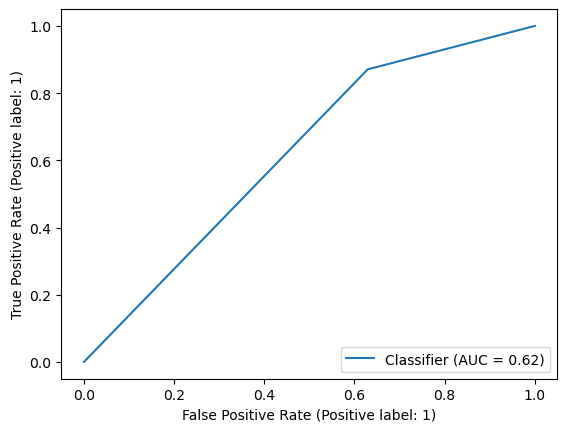

In [214]:
RocCurveDisplay.from_predictions(y_ec1_tl,lr_ec1_tl.predict(X_ec1_tl))

In [215]:
ec1_tl_pred = lr_ec1_tl.predict(test)

In [222]:
lr_ec2_tl = lr.fit(X_ec2_tl,y_ec2_tl)

In [223]:
lr_ec2_tl.score(X_ec2_tl,y_ec2_tl)

0.780376915743932

In [236]:
np.mean(cross_val_score(lr,X_ec2_tl,y_ec2_tl,cv=10))

0.78015703027004

In [226]:
print(classification_report(y_ec2_tl,lr_ec2_tl.predict(X_ec2_tl)))

              precision    recall  f1-score   support

           0       0.31      0.00      0.01      2983
           1       0.78      1.00      0.88     10654

    accuracy                           0.78     13637
   macro avg       0.55      0.50      0.44     13637
weighted avg       0.68      0.78      0.69     13637



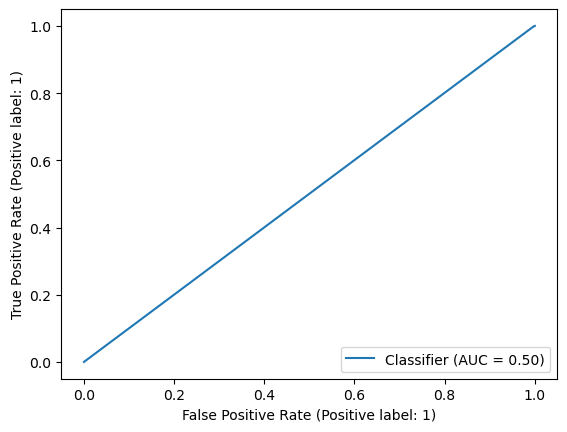

In [227]:
RocCurveDisplay.from_predictions(y_ec2_tl,lr_ec2_tl.predict(X_ec2_tl))

In [230]:
ec2_tl_pred = lr_ec2_tl.predict(test)

In [216]:
submission.EC1 = ec1_tl_pred

In [231]:
submission.EC2 = ec2_tl_pred

In [232]:
submission.EC2.value_counts()

1    9877
0      16
Name: EC2, dtype: int64

In [233]:
submission

,id,EC1,EC2
0,14838,0,1
1,14839,1,1
2,14840,1,1
3,14841,1,1
4,14842,1,1
...,...,...,...
9888,24726,1,1
9889,24727,1,1
9890,24728,1,1
9891,24729,1,1


In [234]:
submission.to_csv('5.csv',index=False)

In [26]:
X_ec1_rus.drop('id',axis=1,inplace=True)

In [42]:
X_ec2_rus.drop('id',axis=1,inplace=True)

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dt = DecisionTreeClassifier(max_depth=6)

In [86]:
dt_ec1 = dt.fit(X_ec1_rus,y_ec1_rus)

In [87]:
dt_ec1.score(X_ec1_rus,y_ec1_rus)

0.6746450304259635

In [100]:
np.mean(cross_val_score(dt,X_ec1_rus,y_ec1_rus,cv=10))

0.6474645030425964

In [89]:
print(classification_report(y_ec1_rus,dt_ec1.predict(X_ec1_rus)))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68      4930
           1       0.68      0.67      0.67      4930

    accuracy                           0.67      9860
   macro avg       0.67      0.67      0.67      9860
weighted avg       0.67      0.67      0.67      9860



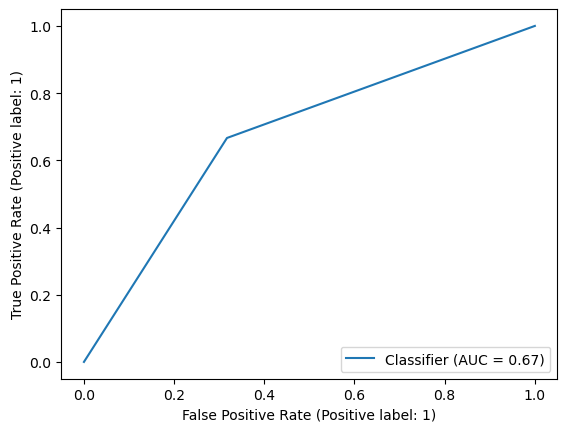

In [90]:
RocCurveDisplay.from_predictions(y_ec1_rus,dt_ec1.predict(X_ec1_rus))

In [91]:
dt_ec2 = dt.fit(X_ec2_rus,y_ec2_rus)

In [92]:
dt_ec2.score(X_ec2_rus,y_ec2_rus)

0.6136439825678847

In [101]:
np.mean(cross_val_score(dt,X_ec2_rus,y_ec2_rus,cv=10))

0.5531277753420346

In [102]:
print(classification_report(y_ec2_rus,dt_ec2.predict(X_ec2_rus)))

              precision    recall  f1-score   support

           0       0.61      0.63      0.62      2983
           1       0.62      0.60      0.61      2983

    accuracy                           0.61      5966
   macro avg       0.61      0.61      0.61      5966
weighted avg       0.61      0.61      0.61      5966



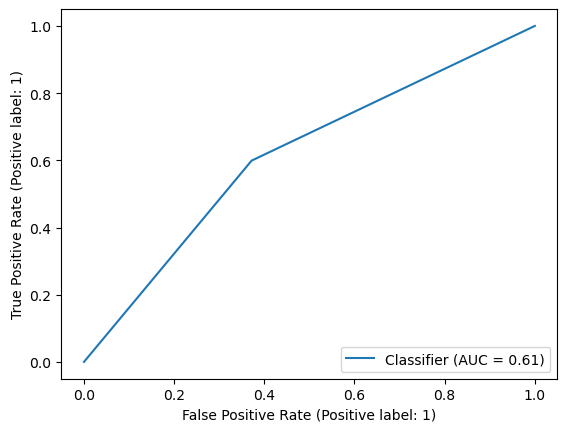

In [103]:
RocCurveDisplay.from_predictions(y_ec2_rus,dt_ec2.predict(X_ec2_rus))

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [201]:
rf = RandomForestClassifier(n_estimators=500,max_features='sqrt',max_depth=12)

In [202]:
rf_ec1 = rf.fit(X_ec1_rus,y_ec1_rus)

In [203]:
rf_ec1.score(X_ec1_rus,y_ec1_rus)

0.8567951318458418

In [177]:
rf_ec1_pred = rf_ec1.predict(test)

In [179]:
submission.EC1 = rf_ec1_pred

In [181]:
submission.EC1.value_counts()

1    5777
0    4116
Name: EC1, dtype: int64

In [207]:
np.mean(cross_val_score(rf,X_ec1_rus,y_ec1_rus))

0.657606490872211

In [163]:
print(classification_report(y_ec1_rus,rf_ec1.predict(X_ec1_rus)))

              precision    recall  f1-score   support

           0       0.71      0.66      0.69      4930
           1       0.68      0.73      0.70      4930

    accuracy                           0.70      9860
   macro avg       0.70      0.70      0.70      9860
weighted avg       0.70      0.70      0.70      9860



In [164]:
pd.crosstab(y_ec1_rus,rf_ec1.predict(X_ec1_rus))

col_0,0,1
EC1,,
0,3274,1656
1,1347,3583


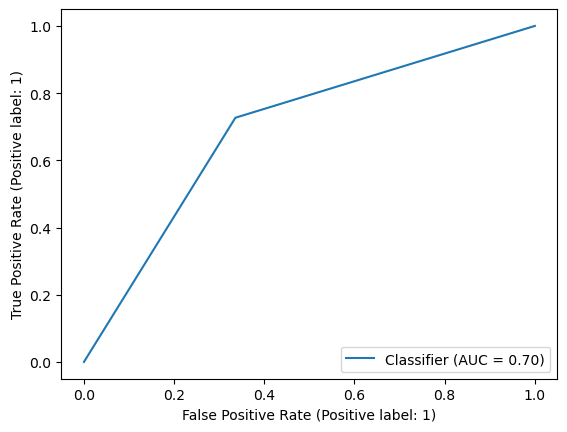

In [165]:
RocCurveDisplay.from_predictions(y_ec1_rus,rf_ec1.predict(X_ec1_rus))

In [204]:
rf_ec2 = rf.fit(X_ec2_rus,y_ec2_rus)

In [205]:
rf_ec2.score(X_ec2_rus,y_ec2_rus)

0.9289306067717064

In [184]:
rf_ec2_pred = rf_ec2.predict(test)

In [186]:
submission.EC2 = rf_ec2_pred

In [188]:
submission.EC2.value_counts()

1    5374
0    4519
Name: EC2, dtype: int64

In [206]:
np.mean(cross_val_score(rf,X_ec2_rus,y_ec2_rus))

0.5589951714425719

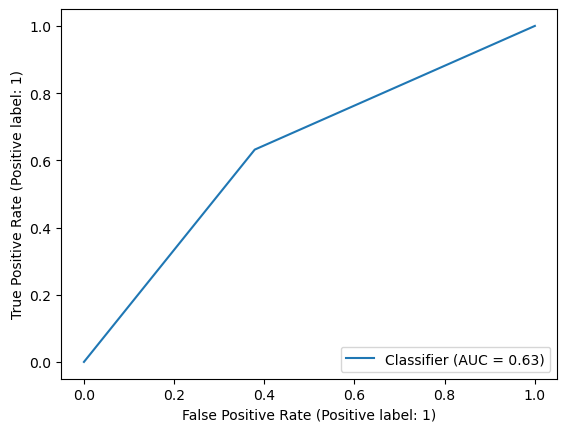

In [169]:
RocCurveDisplay.from_predictions(y_ec2_rus,rf_ec2.predict(X_ec2_rus))

In [189]:
submission.to_csv('7.csv',index=False)

In [190]:
from sklearn.ensemble import GradientBoostingClassifier

In [208]:
gb = GradientBoostingClassifier()

In [226]:
gb_ec1 = gb.fit(X_ec1_rus,y_ec1_rus)

In [227]:
gb_ec1.score(X_ec1_rus,y_ec1_rus)

0.6881338742393509

In [211]:
np.mean(cross_val_score(gb,X_ec1_rus,y_ec1_rus))

0.6581135902636917

In [212]:
print(classification_report(y_ec1_rus,gb_ec1.predict(X_ec1_rus)))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68      4930
           1       0.68      0.71      0.69      4930

    accuracy                           0.69      9860
   macro avg       0.69      0.69      0.69      9860
weighted avg       0.69      0.69      0.69      9860



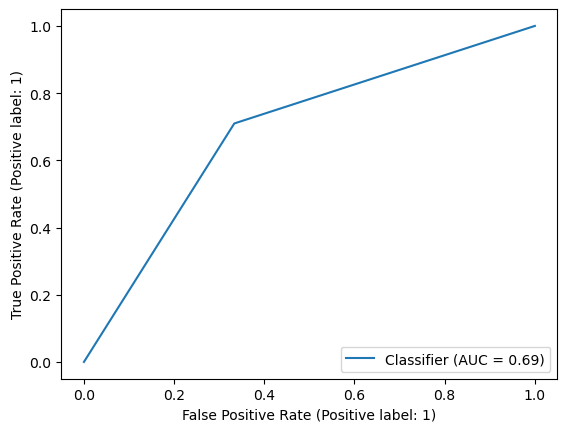

In [213]:
RocCurveDisplay.from_predictions(y_ec1_rus,gb_ec1.predict(X_ec1_rus))

In [229]:
gb_ec2 = gb.fit(X_ec2_rus,y_ec2_rus)

In [230]:
gb_ec2.score(X_ec2_rus,y_ec2_rus)

0.6672812604760309

In [217]:
np.mean(cross_val_score(gb,X_ec2_rus,y_ec2_rus))

0.5467638556010003

In [218]:
print(classification_report(y_ec2_rus,gb_ec2.predict(X_ec2_rus)))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      2983
           1       0.67      0.66      0.67      2983

    accuracy                           0.67      5966
   macro avg       0.67      0.67      0.67      5966
weighted avg       0.67      0.67      0.67      5966



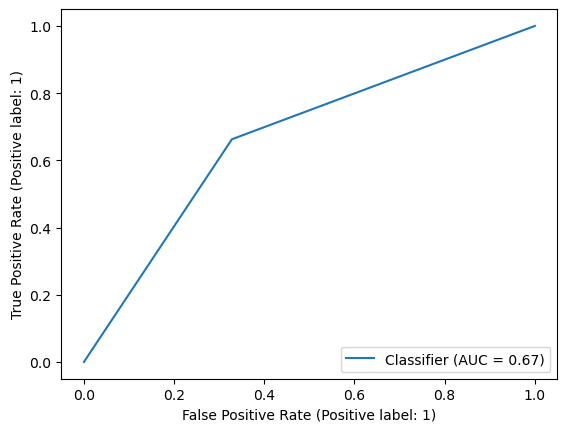

In [219]:
RocCurveDisplay.from_predictions(y_ec2_rus,gb_ec2.predict(X_ec2_rus))

In [228]:
gb_ec1_pred = gb_ec1.predict(test)

In [231]:
gb_ec2_pred = gb_ec2.predict(test)

In [223]:
submission.EC1.value_counts(),submission.EC2.value_counts()

(1    5777
 0    4116
 Name: EC1, dtype: int64,
 1    5374
 0    4519
 Name: EC2, dtype: int64)

In [232]:
submission.EC1 = gb_ec1_pred


In [235]:
submission.EC1.value_counts(),submission.EC2.value_counts()

(1    5696
 0    4197
 Name: EC1, dtype: int64,
 1    5257
 0    4636
 Name: EC2, dtype: int64)

In [234]:
submission.EC2 = gb_ec2_pred

In [236]:
submission.to_csv('9.csv',index=False)